## Importing libraries, loading data in dataframe and handling for null values

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
file_path = 'youtube_data.csv'

In [6]:
df = pd.read_csv(file_path,on_bad_lines='skip')

C:\Users\hp\AppData\Local\Temp\ipykernel_4168\2294948549.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,on_bad_lines='skip')


In [7]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [8]:
df.shape

(691400, 4)

In [9]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## Youtube Sentiment Analysis
Content Analysis

In [12]:
import sys
!"{sys.executable}" -m pip install textblob

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from textblob import TextBlob

In [14]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [15]:
#normal text

TextBlob("#1 on trending AYYEEEEE")

TextBlob("#1 on trending AYYEEEEE")

In [16]:
#"sentiment attribute"

TextBlob("#1 on trending AYYEEEEE").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [17]:
#"Sentiment's polarity -> 1 = positive, -1 = negative, 0 = neutral"

polarity = TextBlob("#1 on trending AYYEEEEE").sentiment.polarity
print("Polarity is : ", polarity)

Polarity is :  0.0


In [18]:
# Finding polarity of each row in "comment_text" column

polarity = []
for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [19]:
# Length of list -> polarity

len(polarity)

691374

In [20]:
df['polarity'] = polarity

In [21]:
df.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


## WordCloud Analysis of Data

In [22]:
#Word cloud analysis is a visual representation technique that displays the most frequently occurring words in a text dataset

In [23]:
filter1 = df['polarity'] == 1
positive_comments = df[filter1]

In [24]:
filter2 = df['polarity'] == -1
negative_comments = df[filter2]

In [25]:
import sys
!"{sys.executable}" -m pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from wordcloud import WordCloud, STOPWORDS

In [27]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [28]:
type(df['comment_text'])

pandas.core.series.Series

In [29]:
#for wordcloud , we need to frame our 'comment_text' feature into string
tot_positive_comments = ' '.join(positive_comments['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

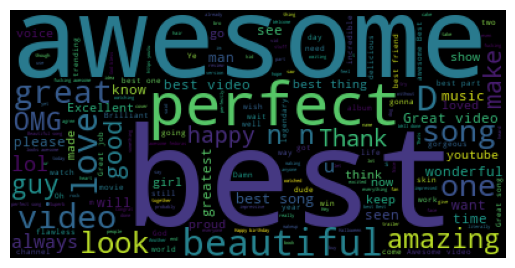

In [30]:
wordcloud_pos = WordCloud(stopwords = set(STOPWORDS),background_color='black').generate(tot_positive_comments) 
plt.imshow(wordcloud_pos)
plt.axis('off')

### Conclusion : positive comments mostly contains words like => awesome, best, perfect, love, beautiful

In [31]:
tot_negative_comments = ' '.join(negative_comments['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

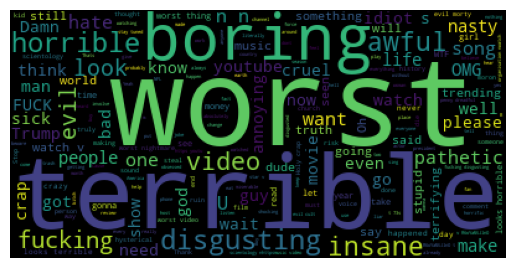

In [32]:
wordcloud_neg = WordCloud(stopwords = set(STOPWORDS)).generate(tot_negative_comments)
plt.imshow(wordcloud_neg)
plt.axis('off')

### Conclusion : negative comments mostly contains words like => terrible, boring, worst, insane, disgusting, awful

## Perform emoji analysis

In [33]:
import sys
!"{sys.executable}" -m pip install emoji

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import emoji
emoji.__version__

'2.12.1'

In [35]:
all_emoji_list = []
for comment in df['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)

all_emoji_list[0:10]
        

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [36]:
#counter of most common emojis

from collections import Counter
emoji_count = Counter(all_emoji_list).most_common(10)
emoji_count

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [37]:
Counter(all_emoji_list).most_common(10)[0]

('😂', 36987)

In [38]:
Counter(all_emoji_list).most_common(10)[1][0]

'😍'

In [39]:
freq = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [40]:
emojis = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [41]:
# emojis, count = zip(*emoji_count)
# plt.figure(figsize=(10,6))
# plt.bar(emojis, count, color = 'skyblue')
# plt.title("Top 10 most common emojis")
# plt.xlabel("emojis")
# plt.ylabel("frequency")
# plt.show()
#this way does not show all emojis and colours are missing in emojis 

In [42]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [44]:
import plotly.graph_objs as go #plotly.graph_objs is a module within Plotly that provides classes for creating various types of graphs and charts.
from plotly.offline import iplot #iplot is function within plotly.offline module used to render interactive plots directly in a Jupyter Notebook and designed for offline use

trace = go.Bar(x=emojis , y=freq)
iplot([trace])


## Collect data of youtube

In [114]:
import os

In [115]:
files = os.listdir(r"youtube_additional_data")
files

['.ipynb_checkpoints',
 'CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'README.md',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [116]:
#extracting only csv files from all files of directory

csv_files = [file for file in files if '.csv' in file]
csv_files

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [117]:
# To ignore warnings:

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [118]:
# to store all csv files in one data frame
#encoding specifies the file encoding to ensure the CSV is read correctly, especially if it contains special characters.
csv_df = pd.DataFrame()
path = r'youtube_additional_data'
for file in csv_files:
    current_df = pd.read_csv(path+'/'+file, encoding ='iso-8859-1') #The file path is constructed by concatenating the path and the file name.
    csv_df = pd.concat([csv_df, current_df], ignore_index=True)

In [119]:
csv_df.shape

(375942, 16)

In [120]:
csv_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937     True
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [121]:
csv_df[csv_df.duplicated()].shape

(36417, 16)

In [122]:
csv_df = csv_df.drop_duplicates() # all duplicates are droped

In [123]:
csv_df[csv_df.duplicated()].shape

(0, 16)

In [124]:
#again checking the count of rows and columns when the duplicates are dropped
csv_df.shape

(339525, 16)

In [125]:
# storing data as csv

csv_df[0:1000].to_csv(r'youtube_sample.csv', index = False) #index=False: This parameter tells Pandas not to write the row indices to the CSV file.

In [126]:
# storing data as json

csv_df[0:1000].to_json(r'youtube_sample.json')

### Which category has maximum likes?

In [127]:
csv_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [128]:
csv_df['category_id'].unique() # returns an array of unique values of category_id

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [129]:
json_df = pd.read_json(r'D:/Data science/Youtube_Analysis/youtube_additional_data/US_Category_id.json')

In [130]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [131]:
json_df['items'][0] # retrive the first item from items column

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [132]:
category_dict = {}

for item in json_df['items'].values:
    category_dict[int(item['id'])] = item['snippet']['title'] #category_dict[key] = value 

In [133]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [134]:
csv_df['category_name'] = csv_df['category_id'].map(category_dict)
csv_df['category_name']

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
                ...       
375936      People & Blogs
375938      People & Blogs
375939       Entertainment
375940    Film & Animation
375941              Gaming
Name: category_name, Length: 339525, dtype: object

In [135]:
csv_df.head(3) #to check if new column of category_name is added or not

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

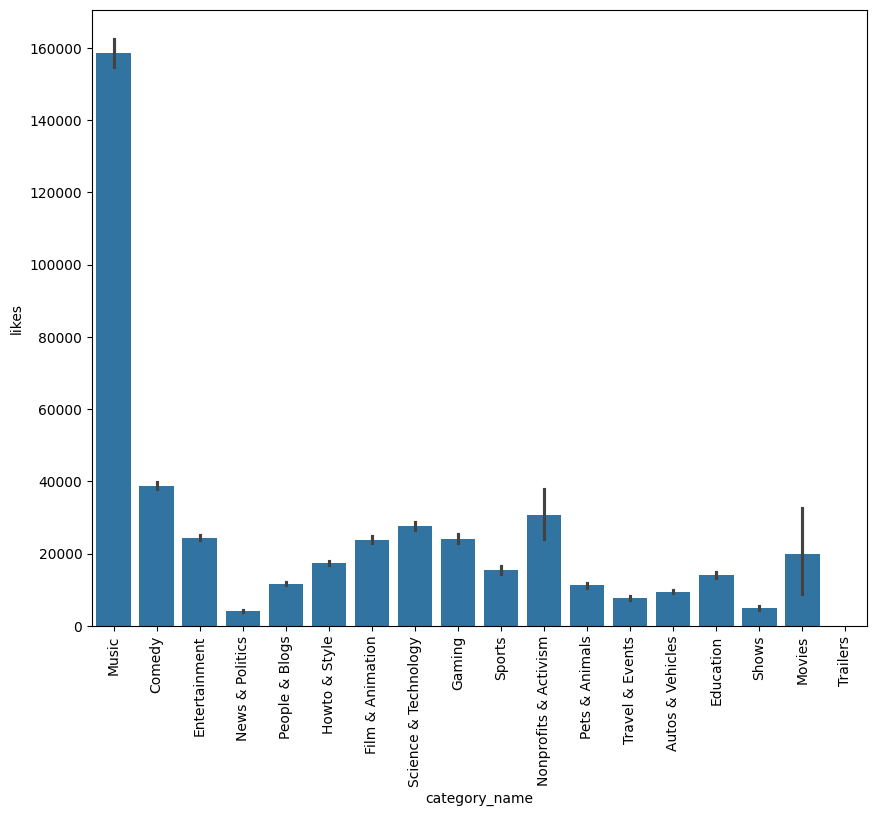

In [136]:
plt.figure(figsize=(10,8))
sns.barplot(x='category_name' , y='likes' ,data=csv_df)
plt.xticks(rotation='vertical')

### Find out if audience is engaged or not?

#### like,dislike,comment_count rate

In [137]:
csv_df['like_rate'] = (csv_df['likes']/csv_df['views'])*100
csv_df['dislike_rate'] = (csv_df['dislikes']/csv_df['views'])*100
csv_df['comment_count_rate'] = (csv_df['comment_count']/csv_df['views'])*100

In [69]:
csv_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

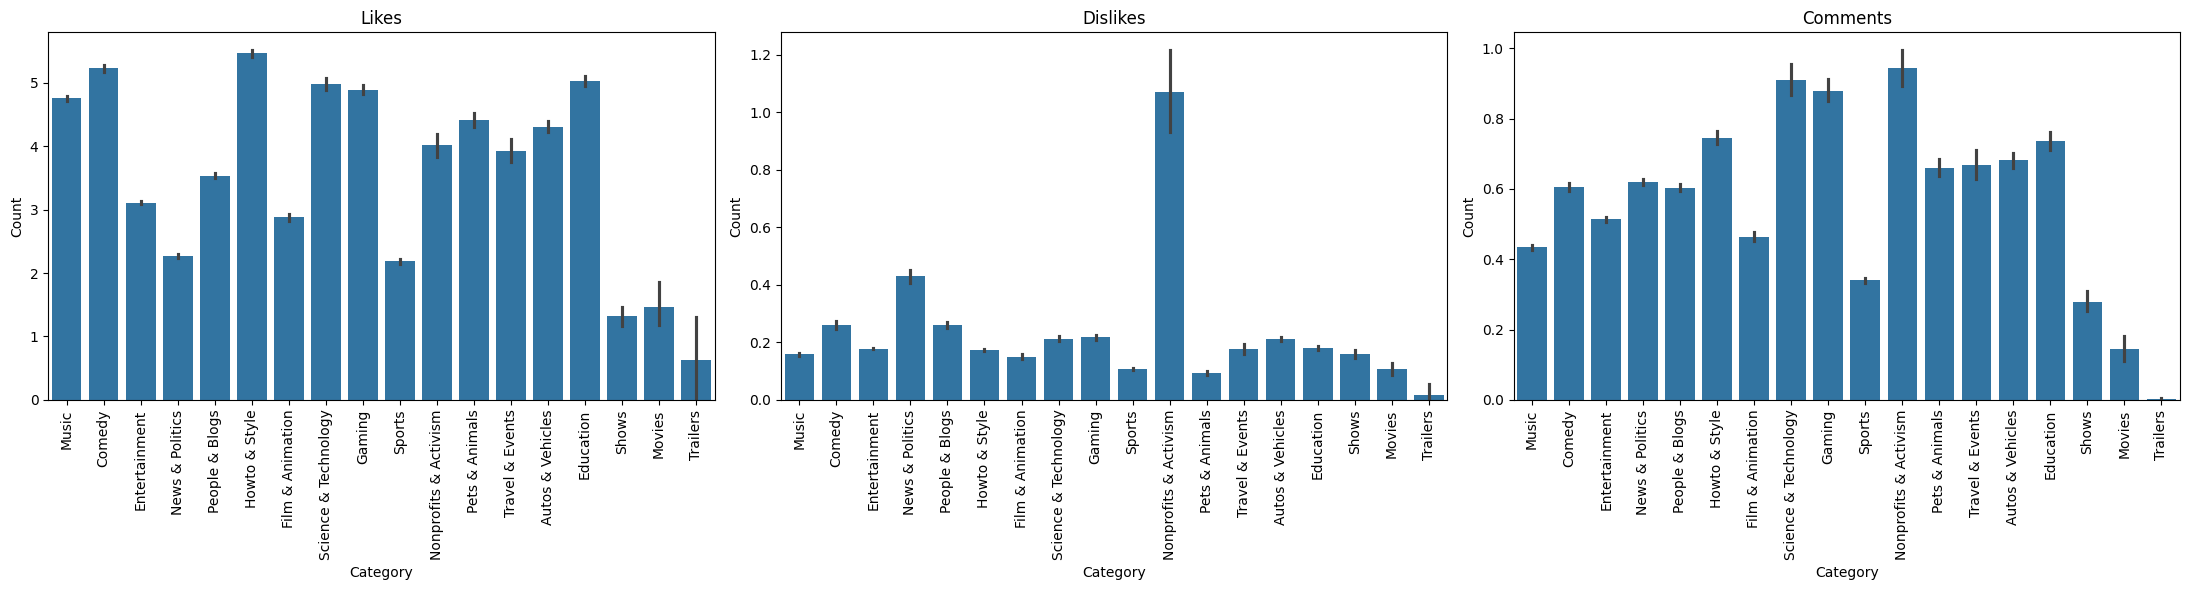

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Bar plot for Likes
sns.barplot(x='category_name', y='like_rate', data=csv_df, ax=axes[0])
axes[0].set_title('Likes')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Bar plot for Dislikes
sns.barplot(x='category_name', y='dislike_rate', data=csv_df, ax=axes[1])
axes[1].set_title('Dislikes')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Bar plot for Comments
sns.barplot(x='category_name', y='comment_count_rate', data=csv_df, ax=axes[2])
axes[2].set_title('Comments')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()


#### relationship between views and likes

<Axes: xlabel='views', ylabel='likes'>

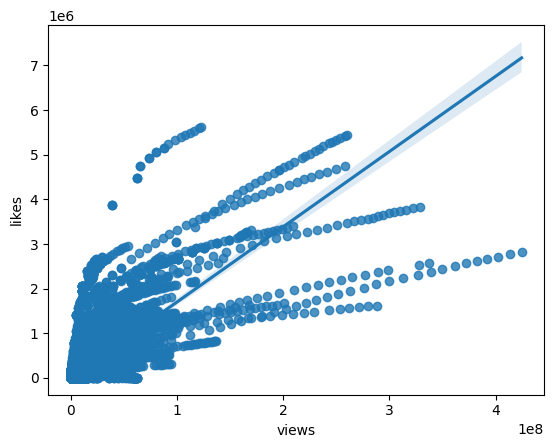

In [71]:
sns.regplot(x='views', y='likes', data= csv_df)

In [72]:
csv_df[['views', 'likes' ,'dislikes']]

,views,likes,dislikes
0,17158579,787425,43420
1,1014651,127794,1688
2,3191434,146035,5339
3,2095828,132239,1989
4,33523622,1634130,21082
...,...,...,...
375936,8259128,645888,4052
375938,1064798,60008,382
375939,1066451,48068,1032
375940,5660813,192957,2846


In [73]:
csv_df[['views', 'likes' ,'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

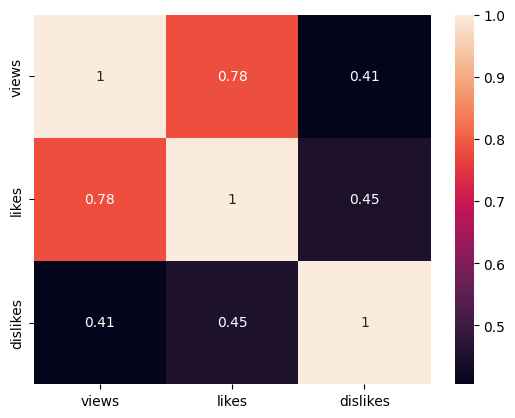

In [74]:
sns.heatmap(csv_df[['views', 'likes' ,'dislikes']].corr(), annot=True)

### Channels with largest number of trending videos

In [75]:
csv_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342


In [76]:
csv_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: count, Length: 37824, dtype: int64

In [77]:
cdf = csv_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [78]:
cdf = cdf.rename(columns={0:'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [79]:
import plotly.express as px

In [80]:
px.bar(data_frame=cdf[0:20] , x='channel_title', y='total_videos')

### Time Series Analysis
Trend Analysis: Ploting trends of views, likes, and comments over time to show how engagement changes.

In [139]:
csv_df['trending_date'] = pd.to_datetime(csv_df['trending_date'], format='%y.%d.%m') #converting to datetime format
csv_df.set_index('trending_date', inplace=True) 
# csv_df[['views','likes','dislikes']].resample('M').sum().plot()
# plt.title('Monthly trends of Views , Likes, Dislikes')
# plt.show()

<Figure size 5000x800 with 0 Axes>

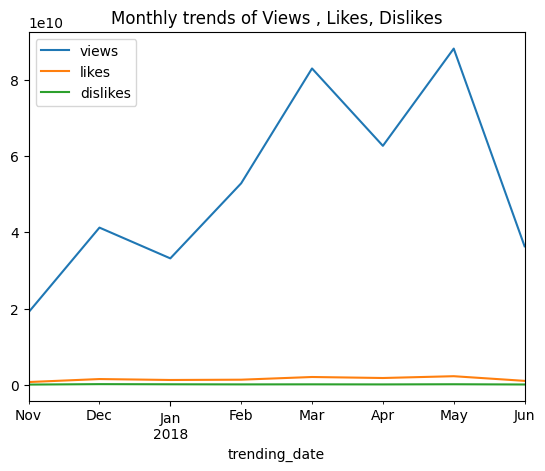

In [148]:
plt.figure(figsize=(50,8))
csv_df[['views','likes','dislikes']].resample('M').sum().plot()
plt.title('Monthly trends of Views , Likes, Dislikes')
plt.show()

In [140]:
csv_df.head()

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
trending_date,,,,,,,,,,,,,,,,,,,
2017-11-14,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
2017-11-14,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2017-11-14,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
2017-11-14,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
2017-11-14,2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


In [150]:
unique_months = csv_df.index.strftime('%B').unique()
print(unique_months)

Index(['November', 'December', 'January', 'February', 'March', 'April', 'May',
       'June'],
      dtype='object', name='trending_date')


In [151]:
unique_years = csv_df.index.strftime('%Y').unique()
print(unique_years)

Index(['2017', '2018'], dtype='object', name='trending_date')


### User Behavior Analysis
Cluster Analysis: Group videos into clusters based on engagement metrics

In [155]:
import sys
!"{sys.executable}" -m pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
from sklearn.cluster import KMeans

In [157]:
User_Behav = csv_df[['views','likes','dislikes']]

In [168]:
kmeans = KMeans(n_clusters = 3 , random_state = 0).fit(User_Behav)

In [169]:
csv_df['cluster'] = kmeans.labels_ #a new column named as cluster is created which stores the assigned cluster number through above step in cluster column

In [170]:
csv_df.head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate,cluster
trending_date,,,,,,,,,,,,,,,,,,,,
2017-11-14,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639,0
2017-11-14,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185,0
2017-11-14,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342,0


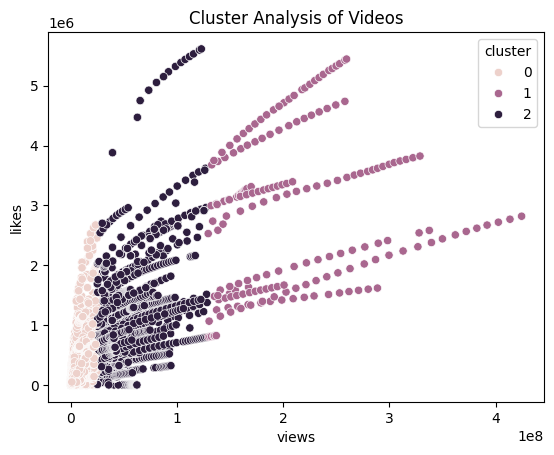

In [171]:
sns.scatterplot(x='views', y='likes', hue='cluster' , data=csv_df)
plt.title('Cluster Analysis of Videos')
plt.show()